In [4]:
import pandas as pd
import seaborn as sb # for visualisation of data
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr


In [5]:
blogdata = pd.read_json("../../exc2/blogdata.json")
blogdata

,BuzzMachine,Treehugger,Gothamist,ongoing,Google Operating System,GigaOM,Deadspin,Signal vs. Noise,Go Fug Yourself,"gapingvoid: ""cartoons drawn on the back of business cards""",...,Seth's Blog,Official Google Blog,Slashdot,Wired News: Top Stories,Instapundit.com,TMZ.com,Copyblogger,Michelle Malkin,John Battelle's Searchblog,Power Line
half,0,0,3,1,0,0,5,1,0,0,...,0,1,0,0,1,0,0,0,0,0
hands,0,0,2,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bad,2,0,5,2,3,0,2,3,0,0,...,0,1,0,0,1,1,0,0,0,0
year,0,4,13,2,3,1,17,1,0,0,...,0,5,6,0,0,0,1,0,2,0
bring,0,0,3,0,0,1,3,0,0,0,...,1,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attention,0,0,3,0,0,2,2,4,0,0,...,1,0,0,0,0,1,1,1,0,0
visit,0,0,2,0,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
front,0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
user,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [7]:
def pearson_dist(x, y):
    r = pearsonr(x, y)[0]
    return 1-abs(r)  #value between 0 and 1.

# Aufgabe 5

In [49]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer

#1. define k=5
k = 5
#2. initialize centroids
sample = blogdata.to_numpy() #sample is now a matrix. Each line is the vector of a datapoint
centers = random_center_initializer(sample, k).initialize()
centers

[array([0, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 2,
        1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64),
 array([0, 1, 2, 3, 8, 0, 5, 5, 0, 0, 0, 1, 3, 2, 1, 1, 1, 1, 0, 1, 2, 5,
        0, 0, 0, 4, 3, 4, 0, 4, 1, 3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3,
        1, 5, 0, 1, 3, 1, 4, 3, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 7, 0,
        0, 0, 0, 2, 0, 4, 0, 8, 4, 5, 0, 0, 2, 2, 7, 7, 0, 5, 0, 2, 2, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        8, 0, 0, 0, 3, 6, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        1, 3, 0, 1, 0, 0, 0, 5, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 9, 0,
        0, 0, 6, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 1, 1, 0, 0, 0, 1,


In [22]:
metric = distance_metric(type_metric.USER_DEFINED, func=pearson_dist)
#following happens multiple times

kmeans_instance = kmeans(sample, centers, metric=metric)
#3.sequentially get an observation and assign it to the nearest centroid  & 4. update centroids position & 5. terminate or go back to 3.
#anstatt __update_centers für EINEN schritt
kmeans_instance.process()
clusters = kmeans_instance.get_clusters() # returns a list of the clusters with the indices of their datapoints -> that's why they have different lenghts
#the indices in 'clusters' refer to the datapoints at that index in 'sample'.


82

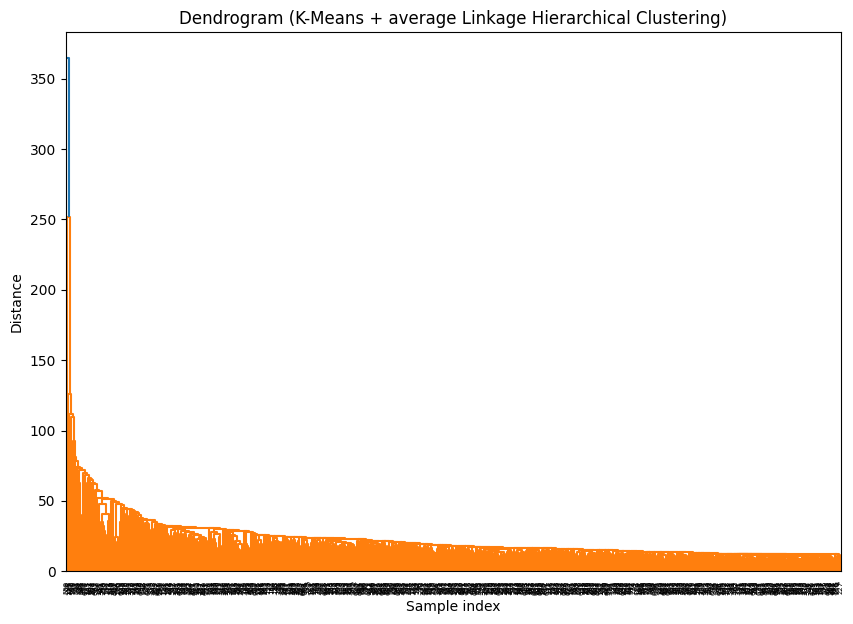

In [47]:
# df = pd.DataFrame([clusters[0], clusters[1], clusters[2], clusters[3], clusters[4]])

#get all indices of every datapoint (now they are "sorted" in the way they belong to the cluster)

flattened_indices = [index for cluster in clusters for index in cluster]
ordered_sample = sample[flattened_indices] # now we have the vectors of the datapoints

# clusters_npy = np.array(clusters,dtype=object)
# for i in range(k):
#     clusters_npy[i] = np.array(clusters_npy[i])
# type(clusters_npy)
# # type(clusters_npy)
Z = hierarchy.linkage(ordered_sample, method='average') # linkage describes when two points(point-cluster/cluster-cluster) are similar

# Plot the dendrogram
plt.figure(figsize=(10, 7))
hierarchy.dendrogram(Z, labels=flattened_indices)
plt.title("Dendrogram (K-Means + average Linkage Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Aufgabe 6

In [57]:
#distances between nodes and centroids
final_centers = kmeans_instance.get_centers() # In final_centers[0] sind die Koordinaten des Centroiden 0 

#frage: ist final_centers[0] der gleiche Cluster wie clusters[0]?
distances = [0] * len(sample)   #idee: speichere an der gleichen Stelle wie der Datenpunkte in sample die Abstände der Datenpunkte zu ihren Centroiden(final_centers).
for cluster in clusters:
    for i in cluster:
        distances[i] = np.linalg.norm(sample[i]-final_centers[i]) 
   

IndexError: list index out of range